In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/titanic.csv')

In [3]:
df.sample

<bound method NDFrame.sample of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [4]:
print(f"El shape del conjunto de entrenamiento es {df.shape}. {df.shape[0]} filas y {df.shape[1]} columnas.") 

El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


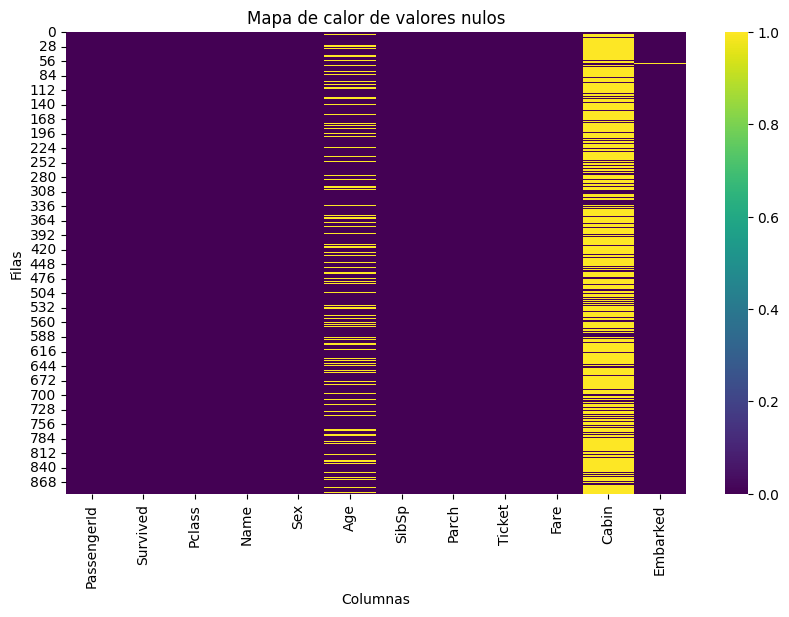

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')
plt.show()


In [8]:
porcentaje_faltantes = (
    df.isnull().mean() * 100
).round(2).sort_values(ascending=False)

print(porcentaje_faltantes)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


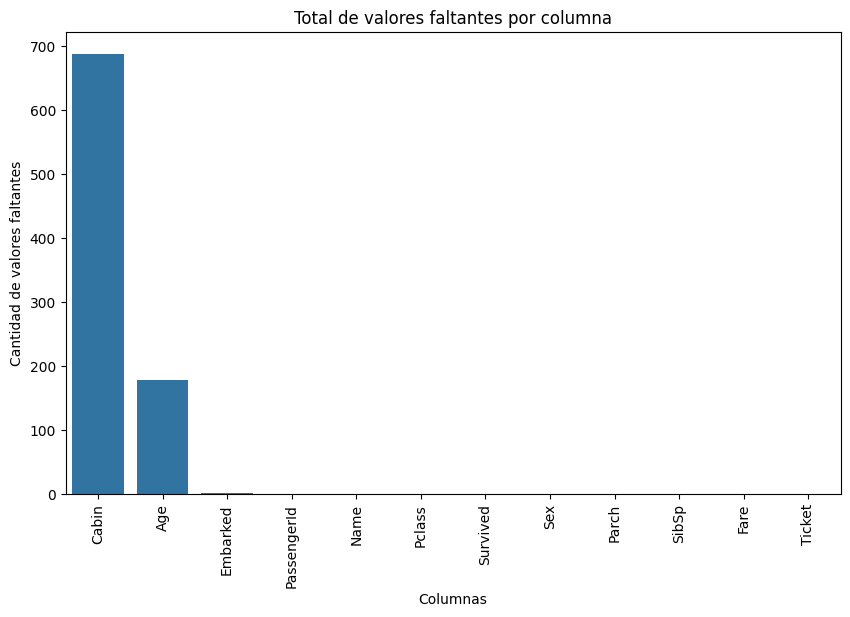

In [9]:
faltantes = df.isnull().sum().reset_index()
faltantes.columns = ['Columna', 'Valores faltantes']
faltantes = faltantes.sort_values('Valores faltantes', ascending=False)

# Crear la gráfica de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=faltantes, x='Columna', y='Valores faltantes')
plt.xticks(rotation=90)
plt.title('Total de valores faltantes por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores faltantes')
plt.show()

In [16]:
df['Age'] = df['Age'].fillna(df['Age'].median())


In [17]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [18]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

Cabin          77.1
PassengerId     0.0
Pclass          0.0
Survived        0.0
Name            0.0
Sex             0.0
SibSp           0.0
Age             0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Embarked        0.0
dtype: float64

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)
df.drop('PassengerId', axis = 1, inplace = True)

In [21]:
print(f"Después de limpiar df: {df.shape[0]} filas y {df.shape[1]} columnas.")

Después de limpiar df: 891 filas y 9 columnas.


In [22]:
df.to_csv('./data/titanic_clean.csv', index=False)